# 天池大赛-快来一起挖掘幸福感
#### By 王升
#### 2020.12.24

#### 赛题与数据：https://tianchi.aliyun.com/competition/entrance/231702/information

In [1]:
# 导入库函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1 数据处理及探索

In [2]:
# 读取数据
data_train = pd.read_csv('happiness_train_abbr.csv')
data_test = pd.read_csv('happiness_test_abbr.csv')

In [3]:
# 查看数据大小
print('data_train shape:', data_train.shape)
print('data_test shape:', data_test.shape)

data_train shape: (8000, 42)
data_test shape: (2968, 41)


In [4]:
# 简要浏览数据
data_train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


In [5]:
# 查看数据信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
id                 8000 non-null int64
happiness          8000 non-null int64
survey_type        8000 non-null int64
province           8000 non-null int64
city               8000 non-null int64
county             8000 non-null int64
survey_time        8000 non-null object
gender             8000 non-null int64
birth              8000 non-null int64
nationality        8000 non-null int64
religion           8000 non-null int64
religion_freq      8000 non-null int64
edu                8000 non-null int64
income             8000 non-null int64
political          8000 non-null int64
floor_area         8000 non-null float64
height_cm          8000 non-null int64
weight_jin         8000 non-null int64
health             8000 non-null int64
health_problem     8000 non-null int64
depression         8000 non-null int64
hukou              8000 non-null int64
socialize          8000 non-null

> - **数据类型只有 survey_time 为 object**
> - **有几个字段存在空值，需要处理**

In [6]:
# 查看数据基本的统计描述
data_train.describe()

,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,...,7.999000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,...,6.776050e+04,2.882500,2.595875,1.063625,1.817125,3.234375,2.226125,1.702500,3.30350,1.094875
std,2309.54541,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,16.842865,1.52882,1.071459,...,2.909591e+05,1.521835,1.077011,0.789402,0.511825,1.423182,0.971525,0.976147,1.98132,3.410180
min,1.00000,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1921.000000,-8.00000,-8.000000,...,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.00000,-8.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,1.00000,1952.000000,1.00000,1.000000,...,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.00000,2.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2.00000,1965.000000,1.00000,1.000000,...,3.800000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.00000,2.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2.00000,1977.000000,1.00000,1.000000,...,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.00000,3.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2.00000,1997.000000,8.00000,1.000000,...,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.00000,4.000000


In [7]:
# 查看标签分布
pd.value_counts(data_train['happiness'], normalize=True)

 4    0.602250
 5    0.176250
 3    0.144875
 2    0.062125
 1    0.013000
-8    0.001500
Name: happiness, dtype: float64

> - **标签是多分类**
> - **标签存在无效值 -8，需要剔除**

In [8]:
# 剔除无效数据
data_train = data_train.loc[(data_train['happiness'] != -8),:]

# 剔除空值
data_train.dropna(subset=['family_income'], inplace=True)

# 填充空值
data_train.fillna(-1, inplace=True)

In [9]:
# 查看每个字段的取值种类数
data_train.nunique()

id                 7987
happiness             5
survey_type           2
province             28
city                 85
county              130
survey_time        7217
gender                2
birth                77
nationality           9
religion              3
religion_freq        10
edu                  15
income              329
political             5
floor_area          398
height_cm            56
weight_jin          147
health                6
health_problem        6
depression            6
hukou                 8
socialize             6
relax                 6
learn                 6
equity                6
class                11
work_exper            6
work_status          11
work_yr              56
work_type             4
work_manage           6
family_income       387
family_m             15
family_status         6
house                16
car                   3
marital               7
status_peer           4
status_3_before       4
view                  6
inc_ability     

> **注意到连续变量： income, floor_area, height_cm, weight_jin, family_income, birth, work_yr**

In [10]:
# 剔除列 id, survey_time, 
X = data_train[[col for col in data_train.columns if col not in ['id', 'survey_time', 'happiness']]]
y = data_train['happiness']

# 将变量分为分类变量和连续变量
continuous_variables = ['income', 'floor_area', 'height_cm', 'weight_jin', 'family_income', 'birth', 'work_yr']
categorical_variables = [col for col in X.columns if col not in continuous_variables]

In [11]:
continuous_variables

['income',
 'floor_area',
 'height_cm',
 'weight_jin',
 'family_income',
 'birth',
 'work_yr']

In [12]:
categorical_variables

['survey_type',
 'province',
 'city',
 'county',
 'gender',
 'nationality',
 'religion',
 'religion_freq',
 'edu',
 'political',
 'health',
 'health_problem',
 'depression',
 'hukou',
 'socialize',
 'relax',
 'learn',
 'equity',
 'class',
 'work_exper',
 'work_status',
 'work_type',
 'work_manage',
 'family_m',
 'family_status',
 'house',
 'car',
 'marital',
 'status_peer',
 'status_3_before',
 'view',
 'inc_ability']

## 2 模型训练

In [13]:
# 导入模型工具包
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [14]:
# 连续变量标准化
X[continuous_variables] = StandardScaler().fit_transform(X[continuous_variables])

# 分类变量类别化
X[categorical_variables] = X[categorical_variables].astype('category')

# 拆分训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# LGB
clf_lgb = LGBMRegressor(num_leaves=2**7, learning_rate=0.1, class_weight='balanced', n_estimators=200, random_state=42, metric='l2')
clf_lgb.fit(X_train, y_train)
y_val_pred_lgb = clf_lgb.predict(X_val)
MSE_lgb = mean_squared_error(y_val, y_val_pred_lgb)
print('测试集MSE_lgb：', MSE_lgb)

测试集MSE_lgb： 0.5389117656886442


In [16]:
# 随机森林
clf_rf = RandomForestRegressor(n_estimators=200, max_depth=7, n_jobs=-1, random_state=42)
clf_rf.fit(X_train, y_train)
y_val_pred_rf = clf_rf.predict(X_val)
MSE_rf = mean_squared_error(y_val, y_val_pred_rf)
print('测试集MSE_rf：', MSE_rf)

测试集MSE_rf： 0.47903041437766386


In [17]:
# 模型融合
y_val_pred_weighted = (1 - MSE_lgb/(MSE_lgb + MSE_rf)) * y_val_pred_lgb + (1 - MSE_rf/(MSE_lgb + MSE_rf)) * y_val_pred_rf
MSE_weighted = mean_squared_error(y_val, y_val_pred_weighted)
print('测试集MSE_weighted：', MSE_weighted)

测试集MSE_weighted： 0.46939692899217894


(array([  9.,  15.,  48., 103., 210., 416., 605., 710., 251.,  30.]),
 array([1.93811   , 2.23652393, 2.53493785, 2.83335177, 3.13176569,
        3.43017961, 3.72859354, 4.02700746, 4.32542138, 4.6238353 ,
        4.92224922]),
 <a list of 10 Patch objects>)

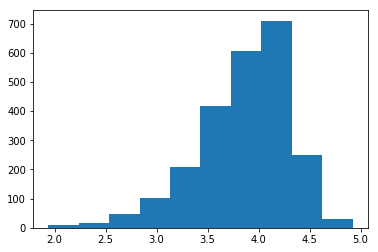

In [18]:
plt.hist(y_val_pred_weighted)

## 3 预测

In [19]:
# 查看数据描述
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 41 columns):
id                 2968 non-null int64
survey_type        2968 non-null int64
province           2968 non-null int64
city               2968 non-null int64
county             2968 non-null int64
survey_time        2968 non-null object
gender             2968 non-null int64
birth              2968 non-null int64
nationality        2968 non-null int64
religion           2968 non-null int64
religion_freq      2968 non-null int64
edu                2968 non-null int64
income             2968 non-null int64
political          2968 non-null int64
floor_area         2968 non-null float64
height_cm          2968 non-null int64
weight_jin         2968 non-null int64
health             2968 non-null int64
health_problem     2968 non-null int64
depression         2968 non-null int64
hukou              2968 non-null int64
socialize          2968 non-null int64
relax              2968 non-null

In [20]:
# 填充空值
data_test.fillna(-1, inplace=True)

In [21]:
# 剔除列 id, survey_time, 
X_test = data_test[[col for col in data_test.columns if col not in ['id', 'survey_time', 'happiness']]]

# 连续变量标准化
X_test[continuous_variables] = StandardScaler().fit_transform(X_test[continuous_variables])

# 分类变量类别化
X_test[categorical_variables] = X_test[categorical_variables].astype('category')

In [22]:
# 预测
y_test_pred_lgb = clf_lgb.predict(X_test)
y_test_pred_rf = clf_rf.predict(X_test)

# 模型融合
y_test_pred_weighted = (1 - MSE_lgb/(MSE_lgb + MSE_rf)) * y_test_pred_lgb + (1 - MSE_rf/(MSE_lgb + MSE_rf)) * y_test_pred_rf
y_test_pred_weighted = np.around(y_test_pred_weighted)

In [23]:
# 预测结果
result = pd.DataFrame()
result['id'] = data_test['id']
result['happiness'] = y_test_pred_weighted.astype(int)
result.head()

,id,happiness
0,8001,3
1,8002,3
2,8003,3
3,8004,4
4,8005,3


In [24]:
# 导出预测结果
result.to_csv('test_happiness_submit.csv', index=False)